In [11]:
# A7. Train a kNN classifier (k =3) using the training set obtained from above exercise. Following code for help: 
# >>> import numpy as np 
# >>> from sklearn.neighbors import KNeighborsClassifier 
# >>> neigh = KNeighborsClassifier(n_neighbors=3) 
# >>> neigh.fit(X, y)
#Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#loads dataset from given path
def load_data():
    df=pd.read_csv(r"C:\EVERYTHING\AIE\2nd year\4th Sem\ML\Assignments\Lab2\iris.csv")
    X=df.iloc[:,:-1].values
    y=df.iloc[:,-1].values
    return X,y

#splits data into train and test sets
def split_data(X,y):
    return train_test_split(X,y,test_size=0.3,random_state=42)

#trains kNN classifier with k=3
def train_knn(X_train,y_train):
    neigh=KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train,y_train)
    return neigh

X,y=load_data()
X_train,X_test,y_train,y_test=split_data(X,y)
model=train_knn(X_train,y_train)

In [2]:
# A8. Test the accuracy of the kNN using the test set obtained from above exercise. Following code for help.
# >>> neigh.score(X_test, y_test)
# This code shall generate an accuracy report for you. Please study the report and understand it.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#loads dataset from given path
def load_data():
    df=pd.read_csv(r"C:\EVERYTHING\AIE\2nd year\4th Sem\ML\Assignments\Lab2\iris.csv")
    X=df.iloc[:,:-1].values
    y=df.iloc[:,-1].values
    return X,y

#splits data into train and test sets
def split_data(X,y):
    return train_test_split(X,y,test_size=0.3,random_state=42)

#trains kNN classifier with k=3
def train_knn(X_train,y_train):
    neigh=KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train,y_train)
    return neigh

#tests accuracy of trained model
def test_accuracy(model,X_test,y_test):
    return model.score(X_test,y_test)

X,y=load_data()
X_train,X_test,y_train,y_test=split_data(X,y)
model=train_knn(X_train,y_train)
accuracy=test_accuracy(model,X_test,y_test)
accuracy

0.9111111111111111

In [3]:
# A9. Use the predict() function to study the prediction behavior of the classifier for test vectors. >>> neigh.predict(X_test)
# Perform classification for a given vector using neigh.predict(<<test_vect>>). This shall produce the class of the test vector (test_vect is any feature vector from your test set).
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#loads dataset from given path
def load_data():
    df=pd.read_csv(r"C:\EVERYTHING\AIE\2nd year\4th Sem\ML\Assignments\Lab2\iris.csv")
    X=df.iloc[:,:-1].values
    y=df.iloc[:,-1].values
    return X,y

#splits data into train and test sets
def split_data(X,y):
    return train_test_split(X,y,test_size=0.3,random_state=42)

#trains kNN classifier with k=3
def train_knn(X_train,y_train):
    neigh=KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train,y_train)
    return neigh

#predicts classes for test vectors
def predict_test(model,X_test):
    return model.predict(X_test)

#predicts class for a single test vector
def predict_single(model,X_test,index=0):
    return model.predict([X_test[index]])

X,y=load_data()
X_train,X_test,y_train,y_test=split_data(X,y)
model=train_knn(X_train,y_train)
test_predictions=predict_test(model,X_test)
single_prediction=predict_single(model,X_test,0)
test_predictions,single_prediction

(array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
        'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
        'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
        'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
        'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
        'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
        'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
        'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object),
 array(['Iris-versicolor'], dtype=object))

In [4]:
# A10. Repeat the kNN classification exercise with your own functions developed. Compare the results obtained from the developed kNN classifier (developed by you) against the package kNN classifier.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#loads dataset from given path
def load_data():
    df=pd.read_csv(r"C:\EVERYTHING\AIE\2nd year\4th Sem\ML\Assignments\Lab2\iris.csv")
    X=df.iloc[:,:-1].values
    y=df.iloc[:,-1].values
    return X,y

#splits data into train and test sets
def split_data(X,y):
    return train_test_split(X,y,test_size=0.3,random_state=42)

#computes euclidean distance
def euclidean(a,b):
    return np.sqrt(np.sum((a-b)**2))

#predicts class using custom knn
def knn_predict(X_train,y_train,test,k):
    distances=[(euclidean(test,x),y_train[i])for i,x in enumerate(X_train)]
    distances.sort(key=lambda x:x[0])
    neighbors=[label for _,label in distances[:k]]
    return max(set(neighbors),key=neighbors.count)

#predicts all test samples using custom knn
def knn_custom(X_train,y_train,X_test,k):
    return np.array([knn_predict(X_train,y_train,x,k)for x in X_test])

#calculates accuracy
def accuracy(y_true,y_pred):
    return np.mean(y_true==y_pred)

X,y=load_data()
X_train,X_test,y_train,y_test=split_data(X,y)

sk_model=KNeighborsClassifier(n_neighbors=3)
sk_model.fit(X_train,y_train)
sk_pred=sk_model.predict(X_test)
sk_acc=accuracy(y_test,sk_pred)

custom_pred=knn_custom(X_train,y_train,X_test,3)
custom_acc=accuracy(y_test,custom_pred)

sk_acc,custom_acc

(0.9111111111111111, 0.9111111111111111)

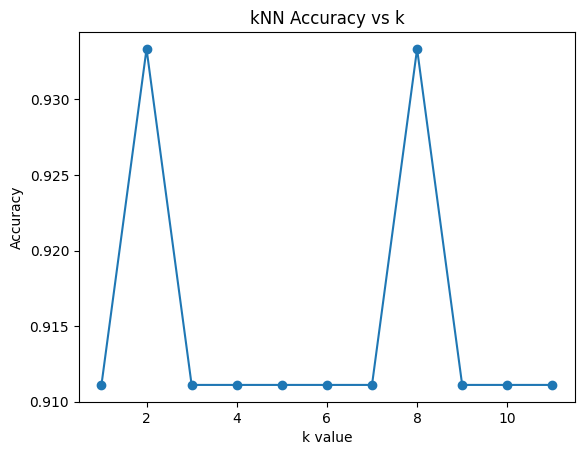

[0.9111111111111111,
 0.9333333333333333,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9333333333333333,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111]

In [5]:
# A11. Make k = 1 to implement NN classifier and compare the results with kNN (k = 3). Vary k from 1 to 11 and make an accuracy plot.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#loads dataset from given path
def load_data():
    df=pd.read_csv(r"C:\EVERYTHING\AIE\2nd year\4th Sem\ML\Assignments\Lab2\iris.csv")
    X=df.iloc[:,:-1].values
    y=df.iloc[:,-1].values
    return X,y

#splits data into train and test sets
def split_data(X,y):
    return train_test_split(X,y,test_size=0.3,random_state=42)

#trains knn model for given k
def train_knn(X_train,y_train,k):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    return model

#computes accuracy for given k
def get_accuracy(X_train,y_train,X_test,y_test,k):
    model=train_knn(X_train,y_train,k)
    return model.score(X_test,y_test)

X,y=load_data()
X_train,X_test,y_train,y_test=split_data(X,y)

k_values=list(range(1,12))
accuracies=[get_accuracy(X_train,y_train,X_test,y_test,k)for k in k_values]

plt.plot(k_values,accuracies,marker='o')
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("kNN Accuracy vs k")
plt.show()

accuracies

In [6]:
# A12. Please evaluate confusion matrix for your classification problem. From confusion matrix, the other performance metrics such as precision, recall and F1-Score measures for both training and test data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report

#loads dataset from given path
def load_data():
    df=pd.read_csv(r"C:\EVERYTHING\AIE\2nd year\4th Sem\ML\Assignments\Lab2\iris.csv")
    X=df.iloc[:,:-1].values
    y=df.iloc[:,-1].values
    return X,y

#splits data into train and test sets
def split_data(X,y):
    return train_test_split(X,y,test_size=0.3,random_state=42)

#trains knn classifier with k=3
def train_knn(X_train,y_train):
    model=KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train,y_train)
    return model

#evaluates confusion matrix and metrics
def evaluate(model,X,y):
    y_pred=model.predict(X)
    cm=confusion_matrix(y,y_pred)
    report=classification_report(y,y_pred)
    return cm,report

X,y=load_data()
X_train,X_test,y_train,y_test=split_data(X,y)
model=train_knn(X_train,y_train)

train_cm,train_report=evaluate(model,X_train,y_train)
test_cm,test_report=evaluate(model,X_test,y_test)

train_cm,train_report,test_cm,test_report

(array([[30,  0,  0],
        [ 0, 36,  1],
        [ 0,  1, 36]], dtype=int64),
 '                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        30\nIris-versicolor       0.97      0.97      0.97        37\n Iris-virginica       0.97      0.97      0.97        37\n\n       accuracy                           0.98       104\n      macro avg       0.98      0.98      0.98       104\n   weighted avg       0.98      0.98      0.98       104\n',
 array([[19,  0,  0],
        [ 0, 10,  3],
        [ 0,  1, 12]], dtype=int64),
 '                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        19\nIris-versicolor       0.91      0.77      0.83        13\n Iris-virginica       0.80      0.92      0.86        13\n\n       accuracy                           0.91        45\n      macro avg       0.90      0.90      0.90        45\n   weighted avg       0.92      0.91      0.91        45\n')

In [7]:
# A13. Write your own code as functions to evaluate the confusion matrix and other performance metrics, namely, Accuracy, Precision. Recall and Fβ-score.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report

#loads dataset from given path
def load_data():
    df=pd.read_csv(r"C:\EVERYTHING\AIE\2nd year\4th Sem\ML\Assignments\Lab2\iris.csv")
    X=df.iloc[:,:-1].values
    y=df.iloc[:,-1].values
    return X,y

#splits data into train and test sets
def split_data(X,y):
    return train_test_split(X,y,test_size=0.3,random_state=42)

#trains knn classifier with k=3
def train_knn(X_train,y_train):
    model=KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train,y_train)
    return model

#evaluates confusion matrix and metrics
def evaluate(model,X,y):
    y_pred=model.predict(X)
    cm=confusion_matrix(y,y_pred)
    report=classification_report(y,y_pred)
    return cm,report

X,y=load_data()
X_train,X_test,y_train,y_test=split_data(X,y)
model=train_knn(X_train,y_train)

train_cm,train_report=evaluate(model,X_train,y_train)
test_cm,test_report=evaluate(model,X_test,y_test)

train_cm,train_report,test_cm,test_report

(array([[30,  0,  0],
        [ 0, 36,  1],
        [ 0,  1, 36]], dtype=int64),
 '                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        30\nIris-versicolor       0.97      0.97      0.97        37\n Iris-virginica       0.97      0.97      0.97        37\n\n       accuracy                           0.98       104\n      macro avg       0.98      0.98      0.98       104\n   weighted avg       0.98      0.98      0.98       104\n',
 array([[19,  0,  0],
        [ 0, 10,  3],
        [ 0,  1, 12]], dtype=int64),
 '                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        19\nIris-versicolor       0.91      0.77      0.83        13\n Iris-virginica       0.80      0.92      0.86        13\n\n       accuracy                           0.91        45\n      macro avg       0.90      0.90      0.90        45\n   weighted avg       0.92      0.91      0.91        45\n')

In [8]:
# A14. Compare the performance of kNN classifier with that of the matrix inversion technique.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#loads dataset from given path
def load_data():
    df=pd.read_csv(r"C:\EVERYTHING\AIE\2nd year\4th Sem\ML\Assignments\Lab2\iris.csv")
    X=df.iloc[:,:-1].values
    y=df.iloc[:,-1].values
    y=np.where(y==np.unique(y)[0],0,1)
    return X,y

#splits data into train and test sets
def split_data(X,y):
    return train_test_split(X,y,test_size=0.3,random_state=42)

#trains knn classifier
def knn_model(X_train,y_train,k=3):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    return model

#trains linear classifier using matrix inversion
def matrix_inversion_model(X_train,y_train):
    Xb=np.c_[np.ones(X_train.shape[0]),X_train]
    w=np.linalg.pinv(Xb)@y_train
    return w

#predicts using matrix inversion model
def matrix_predict(X,w):
    Xb=np.c_[np.ones(X.shape[0]),X]
    return (Xb@w>=0.5).astype(int)

#computes accuracy
def accuracy(y_true,y_pred):
    return np.mean(y_true==y_pred)

X,y=load_data()
X_train,X_test,y_train,y_test=split_data(X,y)

knn=knn_model(X_train,y_train,3)
knn_acc=accuracy(y_test,knn.predict(X_test))

w=matrix_inversion_model(X_train,y_train)
mat_acc=accuracy(y_test,matrix_predict(X_test,w))

knn_acc,mat_acc

(1.0, 1.0)